<h1>Feature Engineering<h1>

</h6>By Navneeth Krishnan 
           </h6>

https://github.com/navneeth-k/Machine_Learning

<blockquote>This is an excercise on the Census Data involving Feature Engineering tasks like Extraction of Data which is of value, data manipulation to extract features. Various representations of data. Getting data from the dataset which is of value and meaning.</blockquote>

<h3>Census Data Analysis</h3>

<h5>1) Read the data and arrange in desired format</h5>

<blockquote>To perform a basic analysis of the data and storing the same in an easy-to-use format for further analysis</blockquote>

In [317]:
#Importing the Required Modules 
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [318]:
#Setting the threshold for the display of dataframe Rows and Columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max.rows',100)

In [319]:
#Reading the data from the provided Excel File
df =  pd.read_excel('Census-1.xlsx')

In [320]:
#Head Function to get an idea  about the Headers and Columns
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,C-8 EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,Table,State,Distt.,Area Name,Total/,Age-group,Total,NaN,NaN,Illiterate,NaN,NaN,Literate,NaN,NaN,Educational level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Code,Code,NaN,Rural/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Literate without,NaN,NaN,Below,NaN,NaN,Primary,NaN,NaN,Middle,NaN,NaN,Matric/Secondary,NaN,NaN,Higher secondary/Intermediate,NaN,NaN,Non-technical diploma or,NaN,NaN,Technical diploma or certificate,NaN,NaN,Graduate & above,NaN,NaN,Unclassified,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Urban/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,educational level,NaN,NaN,primary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pre-University/Senior secondary,NaN,NaN,certificate not equal to degree,NaN,NaN,not equal to degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,NaN
4,NaN,NaN,NaN,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C2308,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,35153231,19278416,15874815,146897597,78445099,68452498,184170833,99311072,84859761,133903266,77629578,56273688,105939743,63769834,42169909,77942593,46481321,31461272,1072289,726565,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,NaN
7,C2308,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
8,C2308,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,424205,248229,175976,17517756,9190737,8327019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136465,75715,60750,NaN
9,C2308,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,351280,202220,149060,22389155,11793414,10595741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96524,52561,43963,NaN


In [321]:
#Renaming the columns as per desired need to make it more readable
df = df.rename(columns={"Unnamed: 0":"tableName","Unnamed: 1":"stateCode","Unnamed: 2":"distCode","Unnamed: 3":"areaName",
                        "Unnamed: 4":"total/rural/urban","C-8  EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011":"ageGroup",
                        "Unnamed: 6":"totalPersons","Unnamed: 7":"totalMales","Unnamed: 8":"totalFemales","Unnamed: 9":"illiteratePersons",
                        "Unnamed: 10":"illiterateMales","Unnamed: 11":"illiterateFemales","Unnamed: 12":"literatePersons","Unnamed: 13":"literateMales",
                        "Unnamed: 14":"literateFemales","Unnamed: 15":"lit_w/o_edu_lvl_Persons","Unnamed: 16":"lit_w/o_edu_lvl_Males",
                        "Unnamed: 17":"lit_w/o_edu_lvl_Females", "Unnamed: 18":"below_primary_Persons","Unnamed: 19":"below_primary_Male",
                        "Unnamed: 20":"below_primary_Female","Unnamed: 21":"primary_Persons","Unnamed: 22":"primary_Male",
                        "Unnamed: 23":"primary_Female","Unnamed: 24":"middle_Persons","Unnamed: 25":"middle_Male",
                        "Unnamed: 26":"middle_Female","Unnamed: 27":"matric_secondary_Persons","Unnamed: 28":"matric_secondary_Male",
                        "Unnamed: 29":"matric_secondary_Female","Unnamed: 30":"hse_inter_pu_Persons","Unnamed: 31":"hse_inter_pu_Male",
                        "Unnamed: 32":"hse_inter_pu_Female","Unnamed: 33":"nonTechDip_cert_nonDeg_Persons","Unnamed: 34":"nonTechDip_cert_nonDeg_Male",
                        "Unnamed: 35":"nonTechDip_cert_nonDeg_Female","Unnamed: 36":"techDip_cert_nonDeg_Persons","Unnamed: 37":"techDip_cert_nonDeg_Male",
                        "Unnamed: 38":"techDip_cert_nonDeg_Female","Unnamed: 39":"grad_abov_Persons",
                        "Unnamed: 40":"grad_abov_Male","Unnamed: 41":"grad_abov_Female","Unnamed: 42":"unclassified_Persons","Unnamed: 43":"unclassified_Male",
                        "Unnamed: 44":"unclassified_Female"})

In [322]:
#Dropping the last column as it does not contain any data 
df = df.drop(columns=["Unnamed: 45"])

In [323]:
#df.to_excel('CensusData_Renamed_Cols.xlsx',index=False)

In [324]:
#Dropping the first 5 rows as the same have been used in column names and hence it is redundant
df = df.drop(labels=[0,1,2,3,4,5],axis=0)

In [325]:
#df.to_excel('CensusData_Cleansed_after_removeFirst5rows.xlsx',index=False)

In [326]:
#Checking the Count and Type of data with the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 6 to 3137
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   tableName                       3132 non-null   object
 1   stateCode                       3132 non-null   object
 2   distCode                        3132 non-null   object
 3   areaName                        3132 non-null   object
 4   total/rural/urban               3132 non-null   object
 5   ageGroup                        3132 non-null   object
 6   totalPersons                    3132 non-null   object
 7   totalMales                      3132 non-null   object
 8   totalFemales                    3132 non-null   object
 9   illiteratePersons               3132 non-null   object
 10  illiterateMales                 3132 non-null   object
 11  illiterateFemales               3132 non-null   object
 12  literatePersons                 3132 non-null   

In [327]:
#Using the describe() function we can analyse the number of duplicates/unique in order to drop any columns
df.describe()

,tableName,stateCode,distCode,areaName,total/rural/urban,ageGroup,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
count,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132
unique,1,36,1,36,3,29,3109,3086,3090,2943,2793,2859,2997,2985,2966,2487,2312,2270,2820,2696,2642,2693,2657,2592,2380,2340,2239,2062,2029,1934,1699,1680,1572,930,834,685,1371,1332,992,1510,1491,1375,1666,1436,1372
top,C2308,25,000,State - MEGHALAYA,Rural,7,1176,302,467,589,15,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,3132,87,3132,87,1044,108,3,3,3,5,10,9,108,108,108,110,121,117,108,109,110,325,325,326,649,649,655,973,975,979,1300,1302,1305,1415,1442,1538,1321,1330,1362,1519,1519,1539,162,200,219


In [328]:
#Checking the uniqueness of certain columns as their number of unique value is '1'
df['tableName'].unique().sum()

'C2308'

In [329]:
df['distCode'].unique().sum()

'000'

<blockquote>From the Describe and the above operations we can conclude that the columns 'tableName' and 'distCode' 
are having only one value which is not of use. Hence, dropping the same </blockquote>

In [330]:
#Dropping the columns found above and as they are not adding value for the analysis 
df = df.drop(columns=['tableName', 'distCode'])

In [331]:
#Confirming that the data is Cleansed Properly 
df.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
6,00,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,35153231,19278416,15874815,146897597,78445099,68452498,184170833,99311072,84859761,133903266,77629578,56273688,105939743,63769834,42169909,77942593,46481321,31461272,1072289,726565,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,00,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,424205,248229,175976,17517756,9190737,8327019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136465,75715,60750
9,00,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,351280,202220,149060,22389155,11793414,10595741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96524,52561,43963
10,00,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088,291281,167048,124233,18171490,9579169,8592321,2399511,1231973,1167538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70452,38456,31996


<h5>2) Summary of Literacy Rates in India</h5>

In [332]:
#Store the Totals data in a separate dataframe to perform further analysis
df_totals = df.loc[df['total/rural/urban'] == 'Total']
df_rural = df.loc[df['total/rural/urban'] == 'Rural']
df_urban = df.loc[df['total/rural/urban'] == 'Urban']

In [333]:
df_totals.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
6,00,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,35153231,19278416,15874815,146897597,78445099,68452498,184170833,99311072,84859761,133903266,77629578,56273688,105939743,63769834,42169909,77942593,46481321,31461272,1072289,726565,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,00,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,424205,248229,175976,17517756,9190737,8327019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136465,75715,60750
9,00,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,351280,202220,149060,22389155,11793414,10595741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96524,52561,43963
10,00,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088,291281,167048,124233,18171490,9579169,8592321,2399511,1231973,1167538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70452,38456,31996


In [334]:
#Separate the Total(s) data for the various categories according to Total,Rural,Urban
total_all_ages = df_totals.loc[(df_totals['ageGroup'] == 'All ages') & (df_totals['areaName'] == 'INDIA')]
rural_all_ages = df_rural.loc[(df_rural['ageGroup'] == 'All ages') & (df_rural['areaName'] == 'INDIA')]
urban_all_ages = df_urban.loc[(df_urban['ageGroup'] == 'All ages') & (df_urban['areaName'] == 'INDIA')]

In [335]:
total_all_ages

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
6,00,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,35153231,19278416,15874815,146897597,78445099,68452498,184170833,99311072,84859761,133903266,77629578,56273688,105939743,63769834,42169909,77942593,46481321,31461272,1072289,726565,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454


In [336]:
t1 = total_all_ages['totalPersons'].values[0]
t2 = total_all_ages['literatePersons'].values[0]
t3 = total_all_ages['illiteratePersons'].values[0]
lit_t = float(t2/t1)*100
ilit_t = float(t3/t1)*100
print("Summary of Literacy in the Whole of India is:-")
print("The Total population of INDIA is",t1)
print("The Total Literate population of INDIA is",t2)
print("The Total Illiterate population of INDIA is",t3)
print("Literacy Rate in India is",lit_t)
print("Literacy Rate in India is",ilit_t)

Summary of Literacy in the Whole of India is:-
The Total population of INDIA is 1210854977
The Total Literate population of INDIA is 763638812
The Total Illiterate population of INDIA is 447216165
Literacy Rate in India is 63.066083594253584
Literacy Rate in India is 36.933916405746416


In [337]:
u1 = urban_all_ages['totalPersons'].values[0]
u2 = urban_all_ages['literatePersons'].values[0]
u3 = urban_all_ages['illiteratePersons'].values[0]
r1 = rural_all_ages['totalPersons'].values[0]
r2 = rural_all_ages['literatePersons'].values[0]
r3 = rural_all_ages['illiteratePersons'].values[0]
lit_u = float(u2/u1)*100
ilit_u = float(u3/u1)*100
lit_r = float(r2/r1)*100
ilit_r = float(r3/r1)*100
print("The Total Urban Literate population of INDIA is", u2)
print("The Total Urban Illiterate population of INDIA is", u3)
print("The Total Rural Literate population of INDIA is",r2 )
print("The Total Rural Illiterate population of INDIA is", r3)
print("The Urban Literacy Rate in India is",lit_u)
print("The Urban Illiteracy Rate in India is",ilit_u)
print("The Rural Literacy Rate in India is",lit_r)
print("The Rural Illiteracy Rate in India is",ilit_r)

The Total Urban Literate population of INDIA is 280844977
The Total Urban Illiterate population of INDIA is 96261148
The Total Rural Literate population of INDIA is 482793835
The Total Rural Illiterate population of INDIA is 350955017
The Urban Literacy Rate in India is 74.47372460471173
The Urban Illiteracy Rate in India is 25.526275395288263
The Rural Literacy Rate in India is 57.9063867784492
The Rural Illiteracy Rate in India is 42.0936132215508


<AxesSubplot:title={'center':'Literacy Rate in INDIA'}, ylabel='Various Literacy Stats'>

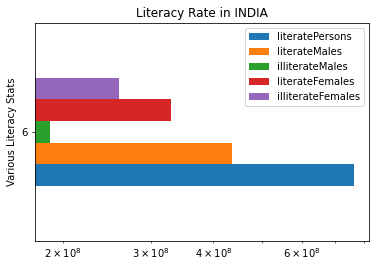

In [338]:
#Graph showing the Total Literacy Rate for INDIA
total_all_ages.plot(y=['literatePersons','literateMales','illiterateMales','literateFemales','illiterateFemales'],kind='barh',
                   title = "Literacy Rate in INDIA",logx=True, xlabel="Various Literacy Stats",ylabel="No. of Persons")

<AxesSubplot:title={'center':'Literacy Rate in Urban INDIA'}, ylabel='Various Literacy Stats'>

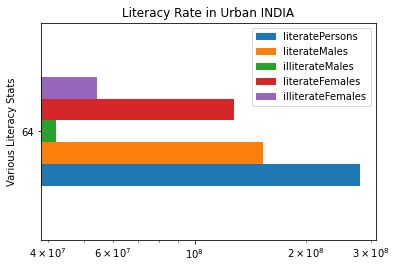

In [339]:
#Graph showing the Total Literacy Rate for Urban INDIA
urban_all_ages.plot(y=['literatePersons','literateMales','illiterateMales','literateFemales','illiterateFemales'],kind='barh',
                   title = "Literacy Rate in Urban INDIA",logx=True, xlabel="Various Literacy Stats",ylabel="No. of Persons")

<AxesSubplot:title={'center':'Literacy Rate in Rural INDIA'}, ylabel='Various Literacy Stats'>

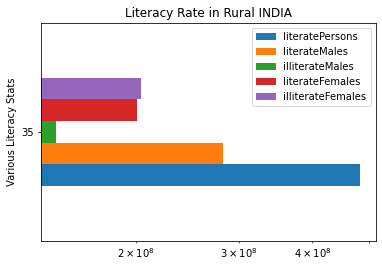

In [340]:
#Graph showing the Total Literacy Rate for Rural INDIA
rural_all_ages.plot(y=['literatePersons','literateMales','illiterateMales','literateFemales','illiterateFemales'],kind='barh',
                   title = "Literacy Rate in Rural INDIA",logx=True, xlabel="Various Literacy Stats",ylabel="No. of Persons")

<h5>3) Summary of Literacy Rates in India based on Age and Gender</h5>

In [341]:
#Storing INDIA total age wise data to a separate dataframe
total_ind_age = df_totals.loc[df_totals['areaName'] == 'INDIA']

In [342]:
total_ind_age.head(5)

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
6,00,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,35153231,19278416,15874815,146897597,78445099,68452498,184170833,99311072,84859761,133903266,77629578,56273688,105939743,63769834,42169909,77942593,46481321,31461272,1072289,726565,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,00,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,424205,248229,175976,17517756,9190737,8327019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136465,75715,60750
9,00,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,351280,202220,149060,22389155,11793414,10595741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96524,52561,43963
10,00,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088,291281,167048,124233,18171490,9579169,8592321,2399511,1231973,1167538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70452,38456,31996


<AxesSubplot:title={'center':'Literacy Rate in INDIA'}, ylabel='Various Age Groups'>

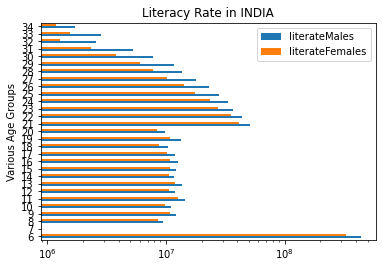

In [343]:
#Graph showing the Total Literate Males and Females in INDIA
total_ind_age.plot(y=['literateMales','literateFemales'],title = "Literacy Rate in INDIA", kind = "barh",logx=True, 
                   xlabel="Various Age Groups",ylabel="No. of Persons")

<AxesSubplot:title={'center':'Literacy Rate in INDIA'}, ylabel='Various Age Groups'>

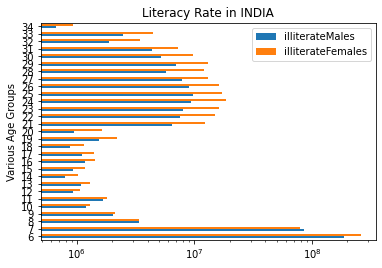

In [344]:
#Graph showing the Total Illiterate Males and Females in INDIA
total_ind_age.plot(y=['illiterateMales','illiterateFemales'],title = "Literacy Rate in INDIA", kind = "barh",logx=True, 
                   xlabel="Various Age Groups",ylabel="No. of Persons")

<AxesSubplot:title={'center':'Literacy Rate in INDIA'}, ylabel='Various Age Groups'>

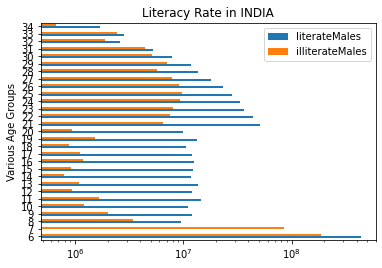

In [345]:
#Graph showing the Total Illiterate and Literate Males in INDIA
total_ind_age.plot(y=['literateMales','illiterateMales'],title = "Literacy Rate in INDIA", kind = "barh",logx=True, 
                   xlabel="Various Age Groups",ylabel="No. of Persons")

<AxesSubplot:title={'center':'Literacy Rate in INDIA'}, ylabel='Various Age Groups'>

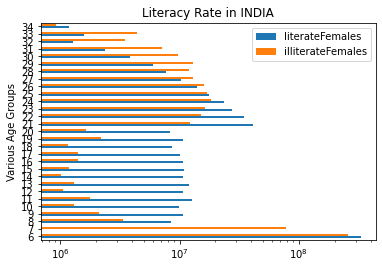

In [346]:
#Graph showing the Total Illiterate and Literate Females in INDIA
total_ind_age.plot(y=['literateFemales','illiterateFemales'],title = "Literacy Rate in INDIA", kind = "barh",logx=True, 
                   xlabel="Various Age Groups",ylabel="No. of Persons")

<h5>4) Woman Matric Level Analysis</h5>

In [347]:
#Separate the Total(s) data for the various categories according to Total,Rural,Urban
w_edu = df_totals.drop(columns=['totalPersons','totalMales','illiteratePersons','illiterateMales','literatePersons',
                                'literateMales','lit_w/o_edu_lvl_Persons','lit_w/o_edu_lvl_Males','below_primary_Persons',
                                'below_primary_Male','primary_Persons','primary_Male','middle_Persons',
                                'middle_Male','matric_secondary_Persons','matric_secondary_Male','hse_inter_pu_Persons',
                                'hse_inter_pu_Male','nonTechDip_cert_nonDeg_Persons','nonTechDip_cert_nonDeg_Male',
                                'techDip_cert_nonDeg_Persons','techDip_cert_nonDeg_Male','grad_abov_Persons',
                                'grad_abov_Male','unclassified_Persons','unclassified_Male'])

In [348]:
w_edu.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalFemales,illiterateFemales,literateFemales,lit_w/o_edu_lvl_Females,below_primary_Female,primary_Female,middle_Female,matric_secondary_Female,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Female,grad_abov_Female,unclassified_Female
6,00,INDIA,Total,All ages,587584719,258709529,328875190,15874815,68452498,84859761,56273688,42169909,31461272,345724,1884558,26168511,1384454
7,00,INDIA,Total,0-6,78762999,78762999,0,0,0,0,0,0,0,0,0,0,0
8,00,INDIA,Total,7,11923276,3359531,8563745,175976,8327019,0,0,0,0,0,0,0,60750
9,00,INDIA,Total,8,12906436,2117672,10788764,149060,10595741,0,0,0,0,0,0,0,43963
10,00,INDIA,Total,9,11209653,1293565,9916088,124233,8592321,1167538,0,0,0,0,0,0,31996


In [349]:
total_w_all = w_edu.loc[(w_edu['ageGroup'] == 'All ages') & (w_edu['areaName'] == 'INDIA')]

In [350]:
total_w_all

,stateCode,areaName,total/rural/urban,ageGroup,totalFemales,illiterateFemales,literateFemales,lit_w/o_edu_lvl_Females,below_primary_Female,primary_Female,middle_Female,matric_secondary_Female,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Female,grad_abov_Female,unclassified_Female
6,00,INDIA,Total,All ages,587584719,258709529,328875190,15874815,68452498,84859761,56273688,42169909,31461272,345724,1884558,26168511,1384454


In [351]:
w_tot = total_w_all['totalFemales'].values[0] #Total Females in India
w_lit = total_w_all['literateFemales'].values[0] #Total Literate Females in India
w_ilit = total_w_all['illiterateFemales'].values[0] #Total Illiterate Females in India
w_mat = total_w_all['matric_secondary_Female'].values[0] #Total Females who have completed Matric
w_hse = total_w_all['hse_inter_pu_Female'].values[0] #Total Females who have completed HSE
w_nontech = total_w_all['nonTechDip_cert_nonDeg_Female'].values[0] #Total Females having Non-Technical Diploma or Cert
w_tech = total_w_all['techDip_cert_nonDeg_Female'].values[0] #Total Females having Technical Diploma or Cert
w_grad = total_w_all['grad_abov_Female'].values[0] #Total Females having degree with Graduation and Above
w_litwo = total_w_all['lit_w/o_edu_lvl_Females'].values[0] #Total Females Literate without education
w_bprim = total_w_all['below_primary_Female'].values[0] #Total Females Below Primary level of education
w_prim =  total_w_all['primary_Female'].values[0] #Total Females with Primary level of education
w_mid = total_w_all['middle_Female'].values[0] #Total Females with Middle level of education
w_matandabov = w_mat+w_hse+w_nontech+w_tech+w_grad #Sum of Females who have completed Education at Matric and above levels
w_pri_mid = w_prim+w_bprim+w_mid #Sum of Females who have  completed only Below Primary, Primary, Middle levels
data = [["w_tot",w_tot],["w_lit",w_lit],["w_ilit",w_ilit],["w_mat",w_mat],["w_hse",w_hse],
        ["w_nontech",w_nontech],["w_tech",w_tech],["w_grad",w_grad],["w_litwo",w_litwo],
        ["w_bprim",w_bprim],["w_prim",w_prim],["w_mid",w_mid],["w_matandabov",w_matandabov],["w_pri_mid",w_pri_mid]]

In [352]:
print("The Total Female Population of India is",w_tot)
print("The Total Literate Population of India is",w_lit)
print("The Total Illiterate Population of India is",w_ilit)
print("The Literacy rate among Females is",float(w_lit/w_tot)*100)
print("The Illiteracy rate among Females is",float(w_ilit/w_tot)*100)

The Total Female Population of India is 587584719
The Total Literate Population of India is 328875190
The Total Illiterate Population of India is 258709529
The Literacy rate among Females is 55.970684629053466
The Illiteracy rate among Females is 44.029315370946534


In [353]:
print("The Female population who have completed Matric level education is",w_mat)
print("The Female population who have completed Matric level education and above is",w_matandabov)
print("The Female population who have completed only Below Primary,Primary,Middle level is",w_pri_mid)

The Female population who have completed Matric level education is 42169909
The Female population who have completed Matric level education and above is 102029974
The Female population who have completed only Below Primary,Primary,Middle level is 209585947


In [354]:
new_index = ['Total Women','Literate Women','Illiterate Women','Women with Matric','Women with HSE','Women with NonTechDip',
             'Women with TechDip','Women with Graduation','Women Literate w/o edu','Women Below Primary',
             'Women with Primary','Women with Middle Lvl','Sum of Women Matric and Above',
             'Sum of Women Below Primary, Primary and Middle ']
df_data = pd.DataFrame(data,index=new_index)
df_data = df_data.drop(columns=[0])
df_data

,1
Total Women,587584719
Literate Women,328875190
Illiterate Women,258709529
Women with Matric,42169909
Women with HSE,31461272
Women with NonTechDip,345724
Women with TechDip,1884558
Women with Graduation,26168511
Women Literate w/o edu,15874815
Women Below Primary,68452498


<blockquote> Here we are NOT considering the Unclassified Women data as we cannot say for sure that they have completed matric or not </blockquote>

<blockquote>As we can see from the above Metrics the no: of Females completing the "Matric" or "Matric and Above"
            education levels is lesser than that of the people who complete only "Below Primary","Primary" and "Middle". 
            Hence, we can conclude that Majority of Women do not complete their Matric </blockquote>

<AxesSubplot:title={'center':'Education Level among Women population of INDIA'}, ylabel='Various Categories of Education in Women'>

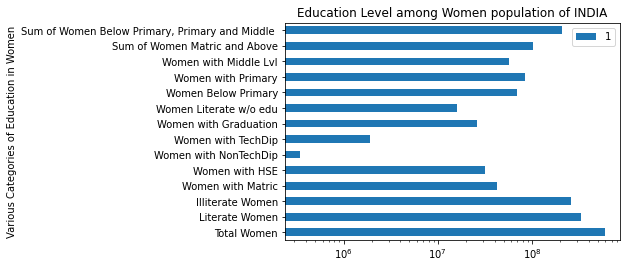

In [355]:
#Graph showing the Total Literacy Rate for Rural INDIA
df_data.plot(kind='barh',title = "Education Level among Women population of INDIA",logx=True, 
                   xlabel="Various Categories of Education in Women",ylabel="No. of Women")

<blockquote> Here, again from the Graph we can clearly see that the No. of Women who have completed Below Primary, Primary, Middle level is greater than that of the Women who have completed Matric and Above</blockquote>

<blockquote>We are considering that the data shown is the education level at that point of time i.e. 
            If a women says she is a Graduate, then it means that she wont be counted in Primary or Matric. We are doing the analysis based on this assumption </blockquote>

<blockquote>Hence, we can conclude that the statement "Majority of the Indian women’s complete the Matric level education" is False and clearly from the above stats we can see that the most of Women do not complete Matric level</blockquote>

<h5>5) Illiteracy Rate below the Age of 10</h5>

<blockquote>Here, we will be using encoding as to Homogenize the "Age-group" column as we need to make a comparison. The Data is a combination of multiple data types and hence we will try to use an encoder.</blockquote>

In [356]:
#Import Required Library
from sklearn.preprocessing import OrdinalEncoder

In [357]:
#Make a copy of original dataframe as to have a separate dataframe without the encoding
df_q5 = df

In [358]:
#Checking the Unique values of the column we need to analyse
df_q5['ageGroup'].unique()

array(['All ages', '0-6', 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80+',
       'Age not stated'], dtype=object)

In [359]:
#Seeing the various quantities or counts of the said Column
df_q5['ageGroup'].value_counts()

7                 108
60-64             108
Age not stated    108
40-44             108
30-34             108
All ages          108
55-59             108
0-6               108
50-54             108
80+               108
65-69             108
75-79             108
20-24             108
35-39             108
70-74             108
8                 108
45-49             108
19                108
18                108
17                108
16                108
15                108
14                108
13                108
12                108
11                108
10                108
9                 108
25-29             108
Name: ageGroup, dtype: int64

In [360]:
#Defining the order in which the encoding should happen, here we can consider that the existing order shown is acceptable
age_order = df_q5['ageGroup'].unique()
age_order

array(['All ages', '0-6', 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80+',
       'Age not stated'], dtype=object)

In [361]:
#Invoking the Ordinal Encoder and passing the Order
enc = OrdinalEncoder(categories = [age_order])

In [362]:
#Fitting the Model onto the Datafram
enc.fit(df_q5[['ageGroup']])

OrdinalEncoder(categories=[array(['All ages', '0-6', 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80+',
       'Age not stated'], dtype=object)])

In [363]:
#Giving the column which has to be transformed
age_enc = pd.DataFrame(enc.transform(df_q5[['ageGroup']]))


In [364]:
#Storing the encoded values onto the Dataframe
age_enc = age_enc.rename(columns={0:"ageGroupEnc"})

In [365]:
age_enc.head(30)

,ageGroupEnc
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0
9,9.0


In [366]:
#Inserting the Encoded Column in the Dataframe
df_q5.insert(4,"ageGroupEnc",age_enc)

In [367]:
#Limiting the dataframe to show values only from India
edu_10 = df_q5.loc[(df_q5['ageGroupEnc'] < 11) & (w_edu['areaName'] == 'INDIA')]

In [368]:
edu_10.head(20)

,stateCode,areaName,total/rural/urban,ageGroup,ageGroupEnc,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
6,00,INDIA,Total,All ages,6.0,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,35153231,19278416,15874815,146897597,78445099,68452498,184170833,99311072,84859761,133903266,77629578,56273688,105939743,63769834,42169909,77942593,46481321,31461272,1072289,726565,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,INDIA,Total,0-6,7.0,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,00,INDIA,Total,7,8.0,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,424205,248229,175976,17517756,9190737,8327019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136465,75715,60750
9,00,INDIA,Total,8,9.0,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,351280,202220,149060,22389155,11793414,10595741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96524,52561,43963
10,00,INDIA,Total,9,10.0,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088,291281,167048,124233,18171490,9579169,8592321,2399511,1231973,1167538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70452,38456,31996
29,00,INDIA,Total,60-64,0.0,37663707,18701749,18961958,19989439,7024725,12964714,17674268,11677024,5997244,1389722,773664,616058,3067703,1782876,1284827,4587619,2803327,1784292,2396768,1662081,734687,2403483,1817072,586411,1479992,1080448,399544,36125,25473,10652,213973,152936,61037,1973967,1514324,459643,124916,64823,60093
30,00,INDIA,Total,65-69,1.0,26454983,12944326,13510657,14829607,5145133,9684474,11625376,7799193,3826183,986972,545793,441179,2381245,1430887,950358,3033591,1922936,1110655,1477355,1041615,435740,1472461,1137617,334844,896634,668648,227986,26019,19045,6974,162259,118515,43744,1089553,864263,225290,99287,49874,49413
31,00,INDIA,Total,70-74,2.0,19208842,9651499,9557343,11568624,4369752,7198872,7640218,5281747,2358471,713522,403035,310487,1726047,1094774,631273,2048788,1368272,680516,887026,646602,240424,861163,687022,174141,544224,419494,124730,16996,12084,4912,103000,74267,28733,661941,535931,126010,77511,40266,37245
32,00,INDIA,Total,75-79,3.0,9232503,4490603,4741900,5361192,1890685,3470507,3871311,2599918,1271393,360910,196435,164475,950043,582371,367672,1020269,655496,364773,427468,301083,126385,421112,330710,90402,266654,205547,61107,8617,5946,2671,48614,33716,14898,327998,268932,59066,39626,19682,19944
33,00,INDIA,Total,80+,4.0,11289005,5283695,6005310,6890447,2456492,4433955,4398558,2827203,1571355,459519,244450,215069,1061493,643700,417793,1166551,740460,426091,529950,354064,175886,448916,329093,119823,294607,208313,86294,8932,6134,2798,36432,24942,11490,339629,250257,89372,52529,25790,26739


<h4>Literacy Criteria according to the Census 2011 by the Union Govt of India</h4>

<blockquote>For the purpose of census 2011, a person aged seven and above, who can both read and write with understanding in any language, is treated as literate</blockquote>

<blockquote>Based on this information we can eleminate the ages '0-6' and 10, as the Statement is about the Illiteracy rate below the age of 10, hence 10 is eleminated. </blockquote>

In [369]:
#Dropping all the other columns that are not needed for Analysis
edu_10 = edu_10.drop(labels=[6,7,29,30,31,32,33,34],axis=0)

In [370]:
edu_10 

,stateCode,areaName,total/rural/urban,ageGroup,ageGroupEnc,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
8,00,INDIA,Total,7,8.0,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,424205,248229,175976,17517756,9190737,8327019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136465,75715,60750
9,00,INDIA,Total,8,9.0,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,351280,202220,149060,22389155,11793414,10595741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96524,52561,43963
10,00,INDIA,Total,9,10.0,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088,291281,167048,124233,18171490,9579169,8592321,2399511,1231973,1167538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70452,38456,31996


In [371]:
#Calculating the Metrics to measure the Literacy rate Below the age of 10 years
t1 = edu_10['totalPersons'].sum() #Total Children below age of 10 
t2 = edu_10['illiteratePersons'].sum() #Total Illiterate Children below the age of 10
t3 = edu_10['literatePersons'].sum() #Total Literate Children below age of 10
lit_below10 = float(t3/t1)*100
ilit_below10 = float(t2/t1)*100
t1,t2,t3,lit_below10, ilit_below10

(75219651, 13371532, 61848119, 82.22335277785322, 17.776647222146778)

In [372]:
#Comparing the Literate and Illiterate Persons
t3>t2

True

<blockquote>Here, we can clearly see that the No. of Literate Children outnumbers the No. of Illiterate Children below the age of 10</blockquote>

In [373]:
#Building a DF for the Graphical Representation
edu_t = edu_10[['ageGroup','totalPersons','illiteratePersons','literatePersons']]

<AxesSubplot:title={'center':'Literacy Rate in Children below the age of 10'}, ylabel='Age of Children'>

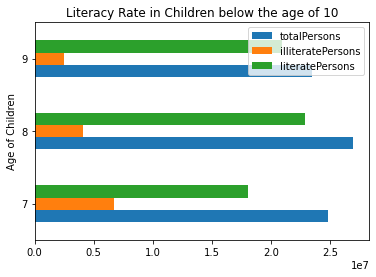

In [374]:
#Graph showing the Literacy Rate for persons below 10
edu_t.plot(kind='barh',x='ageGroup',xlabel='Age of Children',ylabel='No: of Children',
           title='Literacy Rate in Children below the age of 10')

<blockquote>Through, the graph we can again see that the Literate population is high in the age level below 10</blockquote>

<blockquote>Hence, we can conclude that the statement "Illiteracy rate is high in the age level below 10" is False</blockquote>

<h5>6) Top 5 States with High Literacy Rate</h5>

In [375]:
df_totals.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
6,00,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,35153231,19278416,15874815,146897597,78445099,68452498,184170833,99311072,84859761,133903266,77629578,56273688,105939743,63769834,42169909,77942593,46481321,31461272,1072289,726565,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,00,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,424205,248229,175976,17517756,9190737,8327019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136465,75715,60750
9,00,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,351280,202220,149060,22389155,11793414,10595741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96524,52561,43963
10,00,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088,291281,167048,124233,18171490,9579169,8592321,2399511,1231973,1167538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70452,38456,31996


In [376]:
#Building a separate Dataframe from the above Totals Dataframe
state_edu = df_totals.query("areaName not in ['INDIA']")

In [377]:
state_edu.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
93,01,State - JAMMU & KASHMIR,Total,All ages,12541302,6640662,5900640,5474069,2375991,3098078,7067233,4264671,2802562,195783,124009,71774,987774,541130,446644,1285909,719512,566397,1666381,1015129,651252,1411973,919672,492301,776437,486800,289637,4781,3542,1239,50822,33854,16968,653764,401279,252485,33609,19744,13865
94,01,State - JAMMU & KASHMIR,Total,0-6,2018905,1084355,934550,2018905,1084355,934550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95,01,State - JAMMU & KASHMIR,Total,7,270538,142123,128415,91361,45646,45715,179177,96477,82700,3570,2216,1354,173571,93095,80476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2036,1166,870
96,01,State - JAMMU & KASHMIR,Total,8,285314,150470,134844,59762,28675,31087,225552,121795,103757,2704,1683,1021,221202,119170,102032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1646,942,704
97,01,State - JAMMU & KASHMIR,Total,9,252100,133371,118729,38753,18136,20617,213347,115235,98112,2339,1460,879,184326,99450,84876,25468,13603,11865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1214,722,492


In [378]:
#Dropping all the columns which are NOT required for the Analysis
state_edu = state_edu.drop(columns=['totalMales','totalFemales','illiteratePersons','illiterateMales',
                        'illiterateFemales','literateMales','literateFemales','lit_w/o_edu_lvl_Persons',
                        'lit_w/o_edu_lvl_Males','lit_w/o_edu_lvl_Females','below_primary_Persons','below_primary_Male',
                        'below_primary_Female','primary_Persons','primary_Male','primary_Female','middle_Persons',
                        'middle_Male','middle_Female','matric_secondary_Male','matric_secondary_Female',
                        'hse_inter_pu_Male','hse_inter_pu_Female','nonTechDip_cert_nonDeg_Male','nonTechDip_cert_nonDeg_Female',
                        'techDip_cert_nonDeg_Persons','techDip_cert_nonDeg_Male','grad_abov_Male','grad_abov_Female',
                        'unclassified_Persons','unclassified_Male','unclassified_Female'])

In [379]:
state_edu.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,literatePersons,matric_secondary_Persons,hse_inter_pu_Persons,nonTechDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Female,grad_abov_Persons
93,01,State - JAMMU & KASHMIR,Total,All ages,12541302,7067233,1411973,776437,4781,16968,653764
94,01,State - JAMMU & KASHMIR,Total,0-6,2018905,0,0,0,0,0,0
95,01,State - JAMMU & KASHMIR,Total,7,270538,179177,0,0,0,0,0
96,01,State - JAMMU & KASHMIR,Total,8,285314,225552,0,0,0,0,0
97,01,State - JAMMU & KASHMIR,Total,9,252100,213347,0,0,0,0,0


In [380]:
#Querying in the Dataframe to separate out the data for All Ages
state_edu = state_edu.query("ageGroup in ['All ages']")
state_edu.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,literatePersons,matric_secondary_Persons,hse_inter_pu_Persons,nonTechDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Female,grad_abov_Persons
93,01,State - JAMMU & KASHMIR,Total,All ages,12541302,7067233,1411973,776437,4781,16968,653764
180,02,State - HIMACHAL PRADESH,Total,All ages,6864602,5039736,1127997,662457,8519,16200,446609
267,03,State - PUNJAB,Total,All ages,27743338,18707137,4186373,2310511,24287,86564,1760846
354,04,State - CHANDIGARH,Total,All ages,1055450,805438,142206,107599,1506,4141,194453
441,05,State - UTTARAKHAND,Total,All ages,10086292,6880953,1019490,755008,4816,6100,910288


In [381]:
#As we cannot add the values which are of string, temporarily building a DF for Mathematical Operations
state_matric_totals = state_edu.drop(columns=['stateCode','areaName','total/rural/urban','ageGroup',
                                              'totalPersons','literatePersons','matric_secondary_Persons'])

In [382]:
#Calculating the Totals for all the Persons who have education level Above 10th Standard which is Matric/Secondary
state_matric_totals = state_matric_totals.sum(axis=1,skipna=True)

In [383]:
#Adding the data from the above calculation to the Dataframe
state_edu.insert(5,"total_matric_above",state_matric_totals)

In [384]:
state_edu.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,total_matric_above,literatePersons,matric_secondary_Persons,hse_inter_pu_Persons,nonTechDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Female,grad_abov_Persons
93,01,State - JAMMU & KASHMIR,Total,All ages,12541302,1451950.0,7067233,1411973,776437,4781,16968,653764
180,02,State - HIMACHAL PRADESH,Total,All ages,6864602,1133785.0,5039736,1127997,662457,8519,16200,446609
267,03,State - PUNJAB,Total,All ages,27743338,4182208.0,18707137,4186373,2310511,24287,86564,1760846
354,04,State - CHANDIGARH,Total,All ages,1055450,307699.0,805438,142206,107599,1506,4141,194453
441,05,State - UTTARAKHAND,Total,All ages,10086292,1676212.0,6880953,1019490,755008,4816,6100,910288


In [385]:
#Calculating the Literacy rate for Matric and Above
state_tot_by_lit = state_edu['total_matric_above']/state_edu['totalPersons']

In [386]:
#Calculating the percentage value for the Literacy rate above 10th Standard
matrAbovLitPerc = state_tot_by_lit*100

In [387]:
matrAbovLitPerc.head()

93     11.577347
180    16.516398
267    15.074639
354    29.153347
441    16.618714
dtype: object

In [388]:
#Adding the data from the above calculation to the Dataframe
state_edu.insert(5,"matrAbovLitPerc",matrAbovLitPerc)

In [389]:
state_edu.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,matrAbovLitPerc,total_matric_above,literatePersons,matric_secondary_Persons,hse_inter_pu_Persons,nonTechDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Female,grad_abov_Persons
93,01,State - JAMMU & KASHMIR,Total,All ages,12541302,11.577347,1451950.0,7067233,1411973,776437,4781,16968,653764
180,02,State - HIMACHAL PRADESH,Total,All ages,6864602,16.516398,1133785.0,5039736,1127997,662457,8519,16200,446609
267,03,State - PUNJAB,Total,All ages,27743338,15.074639,4182208.0,18707137,4186373,2310511,24287,86564,1760846
354,04,State - CHANDIGARH,Total,All ages,1055450,29.153347,307699.0,805438,142206,107599,1506,4141,194453
441,05,State - UTTARAKHAND,Total,All ages,10086292,16.618714,1676212.0,6880953,1019490,755008,4816,6100,910288


In [390]:
#Sorting the Dataframe according to the Literacy Rate above 10th Standard
state_edu = state_edu.sort_values("matrAbovLitPerc",ascending=False)
state_edu.head(10)

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,matrAbovLitPerc,total_matric_above,literatePersons,matric_secondary_Persons,hse_inter_pu_Persons,nonTechDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Female,grad_abov_Persons
354,04,State - CHANDIGARH,Total,All ages,1055450,29.153347,307699.0,805438,142206,107599,1506,4141,194453
615,07,State - NCT OF DELHI,Total,All ages,16787941,26.218528,4401551.0,12737767,2186314,1598435,12538,32734,2757844
2790,32,State - KERALA,Total,All ages,33406061,23.58067,7877373.0,28135824,3852389,4885082,73857,387113,2531321
2616,30,State - GOA,Total,All ages,1458545,23.248306,339087.0,1165487,185378,179501,1956,10802,146828
2964,34,State - PUDUCHERRY,Total,All ages,1247953,23.136609,288734.0,957309,161826,132950,2204,11551,142029
2529,29,State - KARNATAKA,Total,All ages,61095297,17.566707,10732432.0,40647322,5082407,6300213,206215,182357,4043647
2877,33,State - TAMIL NADU,Total,All ages,72147030,17.25928,12452058.0,51837507,8193224,6429350,150086,414880,5457742
441,05,State - UTTARAKHAND,Total,All ages,10086292,16.618714,1676212.0,6880953,1019490,755008,4816,6100,910288
180,02,State - HIMACHAL PRADESH,Total,All ages,6864602,16.516398,1133785.0,5039736,1127997,662457,8519,16200,446609
2355,27,State - MAHARASHTRA,Total,All ages,112374333,16.1862,18189134.0,81554290,13559841,9288522,83534,177997,8639081


<AxesSubplot:title={'center':'Literacy Rate above 10th Std by States'}, xlabel='State Name', ylabel='Literacy Rate above 10th Std in %'>

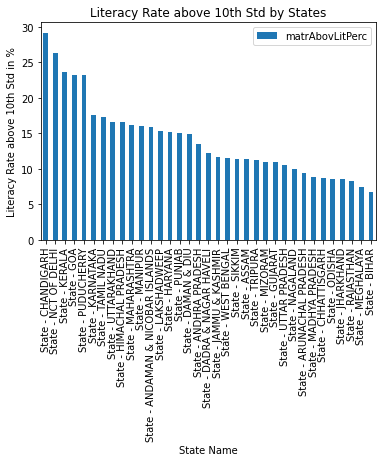

In [391]:
#Building a Separate DF for better Graphical representation 
state_edu_t = state_edu[['areaName','matrAbovLitPerc']]
state_edu_t.plot(kind='bar',x='areaName',xlabel='State Name',ylabel='Literacy Rate above 10th Std in %',
                 title='Literacy Rate above 10th Std by States')

<AxesSubplot:title={'center':'Literacy Rate above 10th Std by States'}, xlabel='State Name', ylabel='Literacy Rate above 10th Std in %'>

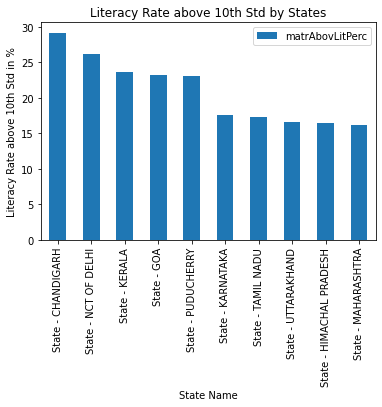

In [392]:
#Building a Graph for the Top 10
state_edu_t_10 = state_edu_t.head(10)
state_edu_t_10.plot(kind='bar',x='areaName',xlabel='State Name',ylabel='Literacy Rate above 10th Std in %',
                 title='Literacy Rate above 10th Std by States')

<blockquote>Here, we need to eleminate the Union Territories from the Top 5, as the question clearly states that we need to find Top 5 States. Hence, Chandigarh, NCT of Delhi, Puducherry get eleminated from the Top 5 even though their Literacy % above 10th Std is one of the Highest</blockquote>

<blockquote>From the above Graph and the resultant Dataframe above, we can conclude that the Top 5 States with the highest Literacy Rate above 10th Standard are :- <br>
    1.Kerala<br>
    2.Goa<br>
    3.Karnataka<br>
    4.Tamil Nadu<br>
    5.Uttarakhand<br></blockquote>

<h5>7) Girl Education in Haryana</h5>

In [393]:
state_edu.head()

,stateCode,areaName,total/rural/urban,ageGroup,totalPersons,matrAbovLitPerc,total_matric_above,literatePersons,matric_secondary_Persons,hse_inter_pu_Persons,nonTechDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Female,grad_abov_Persons
354,04,State - CHANDIGARH,Total,All ages,1055450,29.153347,307699.0,805438,142206,107599,1506,4141,194453
615,07,State - NCT OF DELHI,Total,All ages,16787941,26.218528,4401551.0,12737767,2186314,1598435,12538,32734,2757844
2790,32,State - KERALA,Total,All ages,33406061,23.58067,7877373.0,28135824,3852389,4885082,73857,387113,2531321
2616,30,State - GOA,Total,All ages,1458545,23.248306,339087.0,1165487,185378,179501,1956,10802,146828
2964,34,State - PUDUCHERRY,Total,All ages,1247953,23.136609,288734.0,957309,161826,132950,2204,11551,142029


In [394]:
#Creating a Separate Dataframe with the data only from the State of Haryana
hr_data = df.query("stateCode in ['06']")

In [395]:
#Filtering out Only Totals as we are going to compare only at State Level
hr_data = hr_data.loc[hr_data['total/rural/urban'] == 'Total']

In [396]:
#Filtering out All Ages as the statement is Generalised
hr_data = hr_data.loc[hr_data['ageGroup'] == 'All ages']

In [397]:
hr_data

,stateCode,areaName,total/rural/urban,ageGroup,ageGroupEnc,totalPersons,totalMales,totalFemales,illiteratePersons,illiterateMales,illiterateFemales,literatePersons,literateMales,literateFemales,lit_w/o_edu_lvl_Persons,lit_w/o_edu_lvl_Males,lit_w/o_edu_lvl_Females,below_primary_Persons,below_primary_Male,below_primary_Female,primary_Persons,primary_Male,primary_Female,middle_Persons,middle_Male,middle_Female,matric_secondary_Persons,matric_secondary_Male,matric_secondary_Female,hse_inter_pu_Persons,hse_inter_pu_Male,hse_inter_pu_Female,nonTechDip_cert_nonDeg_Persons,nonTechDip_cert_nonDeg_Male,nonTechDip_cert_nonDeg_Female,techDip_cert_nonDeg_Persons,techDip_cert_nonDeg_Male,techDip_cert_nonDeg_Female,grad_abov_Persons,grad_abov_Male,grad_abov_Female,unclassified_Persons,unclassified_Male,unclassified_Female
528,06,State - HARYANA,Total,All ages,6.0,25351462,13494734,11856728,8752474,3700667,5051807,16598988,9794067,6804921,395890,212259,183631,2473145,1403012,1070133,3772022,2075334,1696688,2705282,1557670,1147612,3225936,2064923,1161013,1892113,1199855,692258,30614,17774,12840,195115,143883,51232,1877085,1102809,774276,31786,16548,15238


<blockquote>In the Below metric calculation we are calculating the percentage of Males and Females at each level of Education </blockquote>

In [398]:
hr_lit_mPerc = hr_data['literateMales']/hr_data['literatePersons']*100
hr_lit_fePerc =  hr_data['literateFemales']/hr_data['literatePersons']*100
lit_wo_edu_mPerc = hr_data['lit_w/o_edu_lvl_Males']/hr_data['lit_w/o_edu_lvl_Persons']*100
lit_wo_edu_fePerc = hr_data['lit_w/o_edu_lvl_Females']/hr_data['lit_w/o_edu_lvl_Persons']*100
below_prim_mPerc = hr_data['below_primary_Male']/hr_data['below_primary_Persons']*100
below_prim_fePerc = hr_data['below_primary_Female']/hr_data['below_primary_Persons']*100
prim_mPerc = hr_data['primary_Male']/hr_data['primary_Persons']*100
prim_fePerc = hr_data['primary_Female']/hr_data['primary_Persons']*100
mid_mPerc = hr_data['middle_Male']/hr_data['middle_Persons']*100
mid_fePerc = hr_data['middle_Female']/hr_data['middle_Persons']*100
matric_mPerc = hr_data['matric_secondary_Male']/hr_data['matric_secondary_Persons']*100
matric_fePerc = hr_data['matric_secondary_Female']/hr_data['matric_secondary_Persons']*100
hse_mPerc = hr_data['hse_inter_pu_Male']/hr_data['hse_inter_pu_Persons']*100
hse_fePerc = hr_data['hse_inter_pu_Female']/hr_data['hse_inter_pu_Persons']*100
nonTechDip_mPerc = hr_data['nonTechDip_cert_nonDeg_Male']/hr_data['nonTechDip_cert_nonDeg_Persons']*100 
nonTechDip_fePerc = hr_data['nonTechDip_cert_nonDeg_Female']/hr_data['nonTechDip_cert_nonDeg_Persons']*100 
techDip_mPerc = hr_data['techDip_cert_nonDeg_Male']/hr_data['techDip_cert_nonDeg_Persons']*100
techDip_fePerc = hr_data['techDip_cert_nonDeg_Female']/hr_data['techDip_cert_nonDeg_Persons']*100
gradAbov_mperc = hr_data['grad_abov_Male']/hr_data['grad_abov_Persons']*100
gradAbov_feperc = hr_data['grad_abov_Female']/hr_data['grad_abov_Persons']*100

<blockquote>Building a Seprate dataframe with the above metrics to better compare the Male and Female distribution at the various levels of Education</blockquote>

In [399]:
data = [["Harayana Litracy Male %",hr_lit_mPerc.values[0]],["Harayana Litracy Female %",hr_lit_fePerc.values[0]],
        ["Literate w/o Education Male %",lit_wo_edu_mPerc.values[0]],
        ["Literate w/o Education Female %",lit_wo_edu_fePerc.values[0]],
        ["Below Primary Male %",below_prim_mPerc.values[0]],["Below Primary Female %",below_prim_fePerc.values[0]],
        ["Primary Male %",prim_mPerc.values[0]],["Primary Female %",prim_fePerc.values[0]],
        ["Middle School Male %",mid_mPerc.values[0]],["Middle School Female %",mid_fePerc.values[0]],
        ["Matric/Secondary Male %",matric_mPerc.values[0]],["Matric/Secondary Female %",matric_fePerc.values[0]],
        ["HSE/Inter Male %",hse_mPerc.values[0]],["HSE/Inter Female %",hse_fePerc.values[0]],   
        ["Non-Technical Diploma Non-Degree Male %",nonTechDip_mPerc.values[0]],
        ["Non-Technical Diploma Non-Degree Female %",nonTechDip_fePerc.values[0]],
        ["Techinical Diploma Non-Degree Male %",techDip_mPerc.values[0]],
        ["Techinical Diploma Non-Degree Female %",techDip_fePerc.values[0]],
        ["Graduation Above Male %",gradAbov_mperc.values[0]],["Graduation Above Female %",gradAbov_feperc.values[0]]
       ]

In [400]:
#Creating the Dataframe with the said data 
df_data_hr = pd.DataFrame(data)
df_data_hr = df_data_hr.rename(columns={0:'Metric',1:'Literacy Rate in %'})
df_data_hr

,Metric,Literacy Rate in %
0,Harayana Litracy Male %,59.004001
1,Harayana Litracy Female %,40.995999
2,Literate w/o Education Male %,53.615651
3,Literate w/o Education Female %,46.384349
4,Below Primary Male %,56.729872
5,Below Primary Female %,43.270128
6,Primary Male %,55.019138
7,Primary Female %,44.980862
8,Middle School Male %,57.578840
9,Middle School Female %,42.421160


<AxesSubplot:title={'center':'Literacy rate by Male/Female at various Education Levels'}, ylabel='Education Level by Male/Female'>

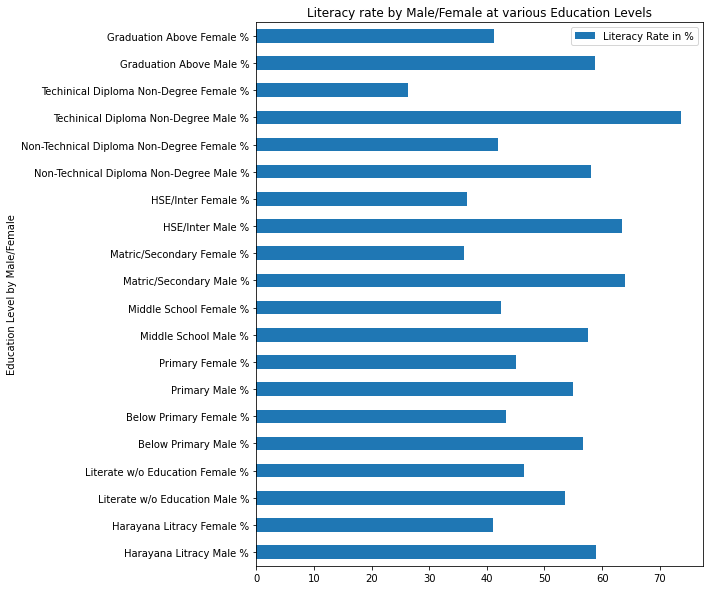

In [401]:
#Building the Graphical Representation of the Data
df_data_hr.plot(kind='barh',x='Metric',xlabel='Education Level by Male/Female',ylabel='Literacy Rate by %',
               title='Literacy rate by Male/Female at various Education Levels',figsize=(8,10,),stacked=True)

<blockquote>From, the above graph we can see the Male and Female Literacy Rate % at various Education Levels</blockquote>

<blockquote>Hence, we can conclude that the statement "In the State of Haryana, girl education is not encouraged" is True, as we can see from the above graph the Literate Males % outnumber the Literate Females % at every education level. Hence, we can conclude that the statement is True </blockquote>